# Setup

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
dataset = pd.read_csv("dataset/dataset_final.csv")
print("Number of rows in the dataset:", len(dataset))

pd.set_option('display.max_columns', None)
dataset.head(10)

Number of rows in the dataset: 52160


,Time,Driver,LapTime,LapNumber,Stint,Compound,TyreLife,FreshTyre,Team,RoundNumber,EventName,Session,EventYear,TimeWeather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,FuelLevel
0,1863.689,VER,91.295,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
1,3315.214,VER,90.503,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
2,4551.213,VER,89.897,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
3,5034.472,VER,89.708,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
4,1926.785,PER,91.479,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1901.344,24.3,16.0,1017.5,False,28.7,333,0.4,2.0
5,3322.843,PER,90.746,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
6,4557.035,PER,90.131,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
7,5040.743,PER,89.846,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
8,1899.739,LEC,91.094,5.0,2.0,SOFT,2.0,True,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
9,3301.222,LEC,91.699,10.0,4.0,SOFT,7.0,False,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0


In [150]:
dataset.columns

Index(['Time', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'RoundNumber', 'EventName', 'Session',
       'EventYear', 'TimeWeather', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'FuelLevel'],
      dtype='object')

In [151]:
# Standardization of original data points (mean 0 and std dev 1)
def standardize(x):
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

# Manual one-hot encoding. Input: list or np array of strings
def one_hot_encode(values):
    unique = sorted(set(values))
    one_hot = np.zeros((len(values), len(unique)))
    for i, val in enumerate(values):
        one_hot[i][unique.index(val)] = 1
    return one_hot

# Get of regression data in matrix form
def build_model_data(X, y):
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), X]
    return A, b

# Extraction of input variables from the dataset
lap_time = dataset['LapTime']
event_name = dataset['EventName'] 
team = dataset['Team']
compound = dataset['Compound']
tyre_life = dataset['TyreLife'] 
fresh_tyre = dataset['FreshTyre'] 
fuel_level = dataset['FuelLevel']
air_temp = dataset['AirTemp']
humidity = dataset['Humidity'] 
pressure = dataset['Pressure']
rainfall = dataset['Rainfall'] 
track_temp = dataset['TrackTemp'] 
wind_direction = dataset['WindDirection'] 
wind_speed = dataset['WindSpeed'] 

# One-hot encoding of categorical variables
event_oh = one_hot_encode(event_name)
team_oh = one_hot_encode(team)
compound_oh = one_hot_encode(compound)
fresh_tyre_oh = one_hot_encode(fresh_tyre)
rainfall_oh = one_hot_encode(rainfall)

# Standardization of numerical variables
X_num = np.c_[
    standardize(tyre_life),
    standardize(air_temp),
    standardize(humidity),
    standardize(pressure),
    standardize(track_temp),
    standardize(wind_direction),
    standardize(wind_speed),
    standardize(fuel_level)
]

# Concatenation of all features
X = np.c_[event_oh, team_oh, compound_oh, fresh_tyre_oh, rainfall_oh, X_num]

# Model build
A, b = build_model_data(X, standardize(lap_time))


In [152]:
#
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    # ***************************************************
    # YOUR CODE HERE
    Axmb = A.dot(x) - b
    grad = 2 * A.T.dot(Axmb)
    # ***************************************************
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):

        # compute objective and gradient
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)

        # ***************************************************
        # YOUR CODE HERE
        # update x by a gradient descent step
        x = x - gamma * grad
        # ***************************************************

        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x=[{w0:.5f},{w1:.5f}]".format(
              bi=n_iter, ti=max_iters - 1, l=obj, w0=x[0], w1=x[1]))

    return objectives, xs

## Naive test

In [153]:
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 1e-6

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00040]
Gradient Descent(1/999): objective=50501.21790, x=[-0.00021,0.00067]
Gradient Descent(2/999): objective=49115.69531, x=[-0.00054,0.00082]
Gradient Descent(3/999): objective=47935.87598, x=[-0.00093,0.00086]
Gradient Descent(4/999): objective=46913.19235, x=[-0.00134,0.00081]
Gradient Descent(5/999): objective=46012.22059, x=[-0.00175,0.00068]
Gradient Descent(6/999): objective=45206.78020, x=[-0.00213,0.00047]
Gradient Descent(7/999): objective=44477.28729, x=[-0.00249,0.00019]
Gradient Descent(8/999): objective=43808.92931, x=[-0.00282,-0.00015]
Gradient Descent(9/999): objective=43190.38708, x=[-0.00310,-0.00055]
Gradient Descent(10/999): objective=42612.92726, x=[-0.00335,-0.00100]
Gradient Descent(11/999): objective=42069.74954, x=[-0.00356,-0.00149]
Gradient Descent(12/999): objective=41555.51151, x=[-0.00373,-0.00204]
Gradient Descent(13/999): objective=41065.97937, x=[-0.00386,-0.00262]
Gradient Descent(14/999):

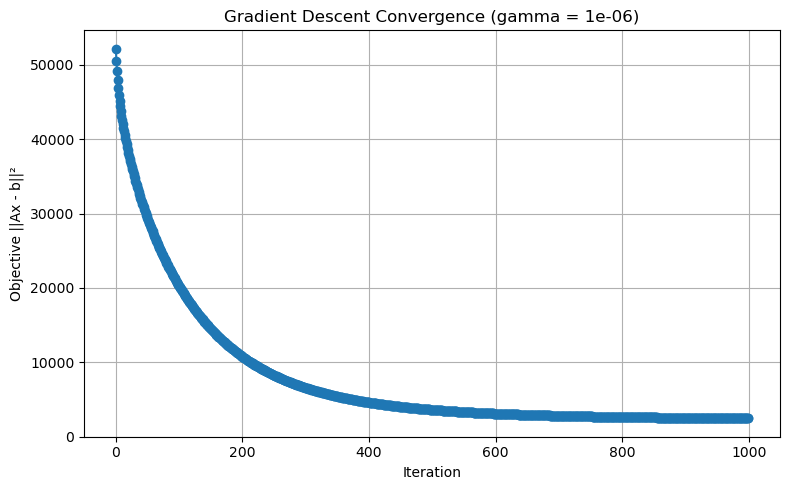

In [154]:
def plot_objective(objectives, gamma):
    """Plot the objective function values during gradient descent."""
    plt.figure(figsize=(8, 5))
    plt.plot(objectives, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Objective ||Ax - b||²')
    plt.ylim(0)
    plt.title(f'Gradient Descent Convergence (gamma = {gamma})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_objective(gradient_objectives_naive, gamma)

# Smoothness constant L

Spiegare perchè posso applicare L Lipschitz

In [155]:
# Define the parameters of the algorithm.

# ***************************************************
# YOUR CODE HERE
# a better learning rate using the smoothness of f
L = calculate_L(A, b)
gamma = 1/L
# ***************************************************

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00125]
Gradient Descent(1/999): objective=47500.16662, x=[-0.00203,0.00120]
Gradient Descent(2/999): objective=44758.58505, x=[-0.00341,0.00033]
Gradient Descent(3/999): objective=42772.54941, x=[-0.00423,-0.00114]
Gradient Descent(4/999): objective=41155.74767, x=[-0.00459,-0.00305]
Gradient Descent(5/999): objective=39751.50452, x=[-0.00461,-0.00530]
Gradient Descent(6/999): objective=38487.34896, x=[-0.00437,-0.00782]
Gradient Descent(7/999): objective=37325.29693, x=[-0.00392,-0.01054]
Gradient Descent(8/999): objective=36242.94677, x=[-0.00332,-0.01344]
Gradient Descent(9/999): objective=35225.73224, x=[-0.00259,-0.01646]
Gradient Descent(10/999): objective=34263.47253, x=[-0.00177,-0.01960]
Gradient Descent(11/999): objective=33348.68019, x=[-0.00087,-0.02282]
Gradient Descent(12/999): objective=32475.64479, x=[0.00010,-0.02610]
Gradient Descent(13/999): objective=31639.89053, x=[0.00111,-0.02944]
Gradient Descent(14/99

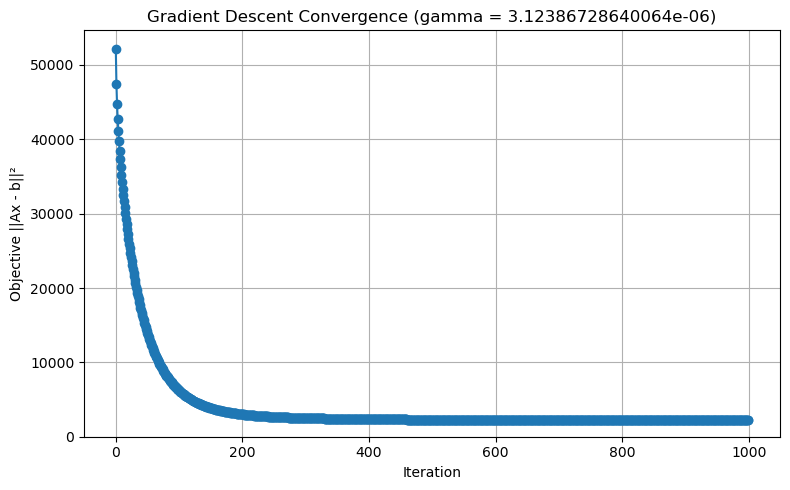

In [156]:
plot_objective(gradient_objectives_smooth, gamma)

## Assuming bounded gradients (Lipschitz function)

In [157]:
R = max(np.linalg.norm(x - x_initial) for x in gradient_xs)
print(f"Stima empirica di R: {R:.4f}")


# ***************************************************
# YOUR CODE HERE
# Compute the bound B on the gradient norm
B = 2 * (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))
# ***************************************************

# ***************************************************
# YOUR CODE HERE
#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))
# ***************************************************

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Stima empirica di R: 4.7517
Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00003]
Gradient Descent(1/999): objective=52046.47322, x=[-0.00000,0.00005]
Gradient Descent(2/999): objective=51934.28591, x=[-0.00000,0.00008]
Gradient Descent(3/999): objective=51823.41417, x=[-0.00001,0.00010]
Gradient Descent(4/999): objective=51713.83458, x=[-0.00001,0.00013]
Gradient Descent(5/999): objective=51605.52419, x=[-0.00001,0.00015]
Gradient Descent(6/999): objective=51498.46054, x=[-0.00002,0.00017]
Gradient Descent(7/999): objective=51392.62161, x=[-0.00002,0.00019]
Gradient Descent(8/999): objective=51287.98585, x=[-0.00003,0.00022]
Gradient Descent(9/999): objective=51184.53213, x=[-0.00004,0.00024]
Gradient Descent(10/999): objective=51082.23975, x=[-0.00005,0.00026]
Gradient Descent(11/999): objective=50981.08845, x=[-0.00005,0.00028]
Gradient Descent(12/999): objective=50881.05836, x=[-0.00006,0.00030]
Gradient Descent(13/999): objective=50782.13000, x=[-0.00007,0.00032]
Gra

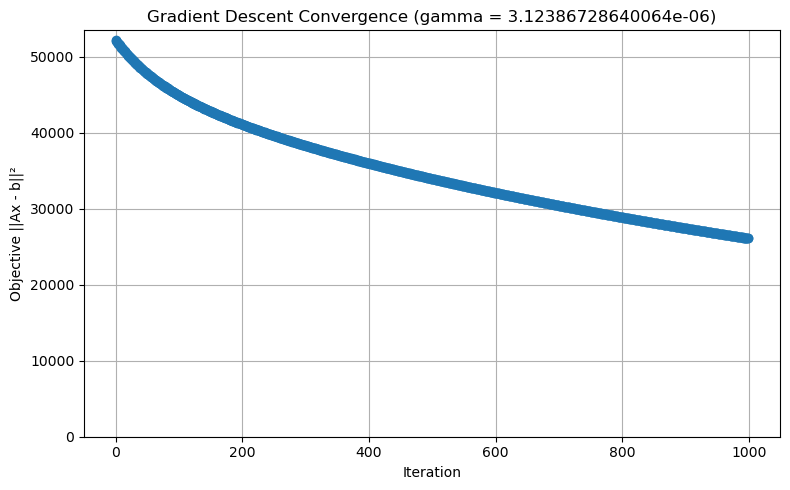

In [158]:
plot_objective(gradient_objectives_bounded, gamma)

### Risultati fino ad ora

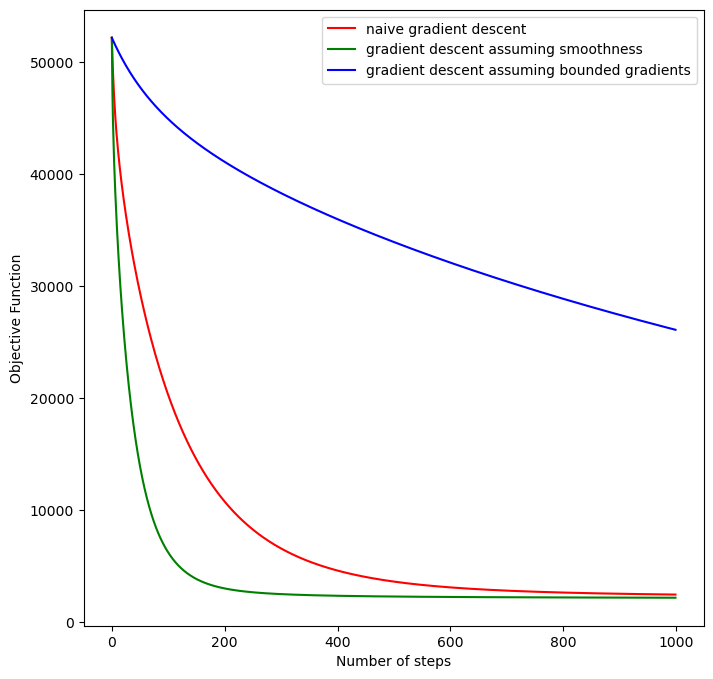

In [159]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(len(gradient_objectives_naive)), gradient_objectives_naive,'red', label='naive gradient descent')
plt.plot(range(len(gradient_objectives_smooth)), gradient_objectives_smooth,'green', label='gradient descent assuming smoothness')
plt.plot(range(len(gradient_objectives_bounded)), gradient_objectives_bounded,'blue', label='gradient descent assuming bounded gradients')
plt.legend(loc='upper right')
plt.show()

---

## Projected Gradient Descent